In [21]:
import experiment
import models

from experiment import *

In [22]:
sim = Exp()

concs = np.geomspace(0.1, 100, 10)
concs = [c*0.1e-9 for c in concs]

start = 0
stop = 100000000
num = 10000
for c in concs:
    sim.add_dataset(np.linspace(start,stop*2,num), np.linspace(start,stop*2,num))
    sim.datasets[-1].add_step(start, stop, c)
    sim.datasets[-1].add_step(stop, stop*2, 0)



In [23]:
sim.model = models.Two_state()
try:
    sim.model.params_definitions['ymax1'].user_data['type']='global'
    sim.model.params_definitions['ymax2'].user_data['type']='global'
except:
    sim.model.params_definitions['ymax'].user_data['type']='global'
sim.create_params()


In [24]:
ys = []
s='''
yymax_ds0	2.60512489	0.01531262	(0.59%)	1	0.00000000	1000.00000	True
ymax_ds2	2.00590807	0.00952992	(0.48%)	1	0.00000000	1000.00000	True
ymax_ds4	1.59121782	0.00465711	(0.29%)	1	0.00000000	1000.00000	True
ymax_ds5	3.40066353	0.02844315	(0.84%)	1	0.00000000	1000.00000	True
ymax_ds6	3.00822879	0.02076409	(0.69%)	1	0.00000000	1000.00000	True
ymax_ds7	3.20188357	0.02746291	(0.86%)	1	0.00000000	1000.00000	True
ymax_ds8	2.98965690	0.02066464	(0.69%)	1	0.00000000	1000.00000	True
ymax_ds9	2.14528839	0.01296954	(0.60%)	1	0.00000000	1000.00000	True
ymax_ds10	1.80359194	0.00868879	(0.48%)	1	0.00000000	1000.00000	True
ymax_ds11	1.51666060	0.00448977	(0.30%)	1	0.00000000	1000.00000	True
ymax_ds12	2.97441677	0.02058196	(0.69%)	1	0.00000000	1000.00000	True
ymax_ds13	2.22655736	0.01337891	(0.60%)	1	0.00000000	1000.00000	True
'''

for line in s.split('\n'):
    try:
        ys.append(float(line.split()[1]))
    except:
        pass

sum(ys)/len(ys)


2.4557665525000005

In [25]:
sim.params['ka1'].value =  1355.25732
sim.params['kd1'].value = 	0.02021307
sim.params['ka2'].value =	0.00477923
sim.params['kd2'].value =	4.0950e-04

sim.params['ymax'].value = 2.4550458316666663


    # sim.params['ymax1'].value = 1
    # sim.params['ymax2'].value = 0.2

#ymax = sim.params['ymax'].value

In [26]:
sim.params

name,value,initial value,min,max,vary
ka1,1355.25732,10000.0,10.0000000,10000000.0,True
kd1,0.02021307,0.01,1.0000e-06,0.10000000,True
ka2,0.00477923,0.01,1.0000e-07,10000000.0,True
kd2,4.0950e-04,0.01,1.0000e-07,10000000.0,True
ymax,2.45504583,1,0.00000000,1000.00000,True


In [27]:
sim.simulate_response(None, 0, 0)

/home/tyras/anaconda3/envs/bli/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(<Figure size 640x480 with 1 Axes>, <Axes: >)

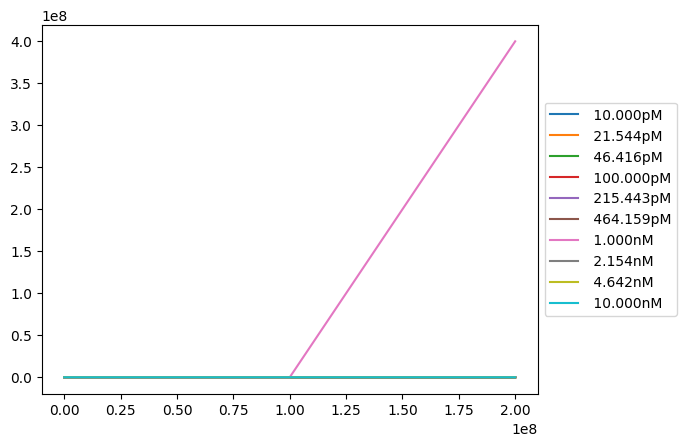

In [28]:
sim.plot()

In [29]:
xs = []
ys = []
for ds in sim:
    xs.append(ds.steps[0].concentration)
    t = ds.t>=ds.steps[0].stop
    y = ds.response[t][0]
    ys.append(y)


In [30]:
# import numpy as np
# import scipy.optimize
# import matplotlib.pyplot as plt

# xs = np.array(xs)
# ys = np.array(ys)

# xs_fitted = np.linspace(0, xs[-1], num=100)

# def func(x, Kd):
#     return ymax*x/(Kd+x)

# p0 = (1e-6)

# params, cv = scipy.optimize.curve_fit(func, xs, ys, p0)
# print(params)
# # perform the fit
# Kd = params[0]


# # determine quality of the fit
# squaredDiffs = np.square(ys - func(xs, Kd))
# squaredDiffsFromMean = np.square(ys - np.mean(ys))
# rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
# print(f"R² = {rSquared}")

# # plot the results
# plt.plot(xs, ys, '.', label="data")
# plt.plot(xs_fitted, func(xs_fitted, Kd), '--', label="fitted")
# # plt.title(f"Y = {Rmax:.2f} * e^(-{Kd:.2f} * t)")

# # inspect the parameters


# plt.show()


True 1e-08 0.02068150895943265 5e-09
True 1.5000000000000002e-08 0.030892144450333222 5e-09
True 2e-08 0.04101748325047091 5e-09
True 2.5e-08 0.05105858972989117 5e-09
True 3e-08 0.06101651062308373 5e-09
True 3.4999999999999996e-08 0.07089227539273055 5e-09
True 3.9999999999999994e-08 0.08068689658448737 5e-09
True 4.499999999999999e-08 0.09040137017305624 5e-09
True 4.999999999999999e-08 0.10003667589979688 5e-09
True 5.499999999999999e-08 0.10959377760211761 5e-09
True 6e-08 0.11907362353487805 5e-09
True 6.5e-08 0.12847714668402935 5e-09
True 7e-08 0.137805265072709 5e-09
True 7.500000000000001e-08 0.14705888206000173 5e-09
True 8.000000000000001e-08 0.15623888663257035 5e-09
True 8.500000000000002e-08 0.1653461536893545 5e-09
True 9.000000000000003e-08 0.1743815443195288 5e-09
True 9.500000000000003e-08 0.1833459060739056 5e-09
True 1.0000000000000004e-07 0.1922400732299619 5e-09
True 1.0500000000000004e-07 0.20106486705066545 5e-09
True 1.1000000000000005e-07 0.20982109603726734 

/home/tyras/anaconda3/envs/bli/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1120157019902D+09   r2 =                  NaN
True 5.499999999999997e-07 0.0 5e-09
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1120157019902D+09   r2 =                  NaN
True 5.549999999999997e-07 0.0 5e-09
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1120157019902D+09   r2 =                  NaN
True 5.599999999999996e-07 0.0 5e-09
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1120157019902D+09   r2 =                  NaN
True 5.649999999999996e-07 0.0 5e-09
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.112

(<Figure size 640x480 with 1 Axes>, <Axes: >)

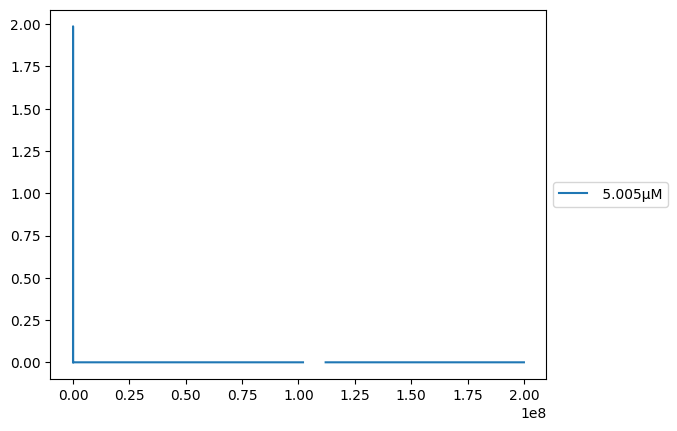

In [31]:
c=concs[-1]
t = sim.datasets[0].t<=sim.datasets[0].steps[0].stop
start = sim.datasets[0].steps[0].start
stop = sim.datasets[0].steps[0].stop
diff = c/2
ymax = sim.params['ymax'].value

for i in range(1000):
    temp = Exp()
    temp.model = sim.model
    temp.params = sim.params
    temp.add_dataset(np.linspace(start,stop*2,num), np.linspace(start,stop*2,num))
    temp.datasets[-1].add_step(start, stop, c)
    temp.datasets[-1].add_step(stop, stop*2, 0)
    temp.simulate_response(None, 0, 0)
    y = temp.datasets[0].response[t][-1]
    print(y<ymax/2, c, y, diff)
    
    if y<ymax/2:
        c=c+diff
    else:
        c=c-diff
        diff = diff*0.9

temp.plot()

In [169]:
ymax

3.8948508204295473

In [80]:
	2.4746e-05/	261482.150

9.463743509834228e-11

In [494]:
ds.response[t][0]

0.0

In [188]:
start = 0
stop = 100000
for c in concs:
    sim.add_dataset(np.linspace(start,stop,stop), np.linspace(1000,2000,1000))
    sim.datasets[-1].add_step(start, stop-1000, c)
    sim.datasets[-1].add_step(stop-1000, stop, 0)